In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"/Users/siddhant/Downloads/medical_cost_insurance (1).csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.drop("region",axis=1,inplace=True) # dropping region column

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

# encoding smoker and sex to binary using label encoding 

In [15]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [11]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


**Observations:-**

**BMI:**

-The mean BMI is around 30.66, which is generally considered overweight according to healthcare standards.
-The standard deviation is 6.1, indicating moderate variability.
-The minimum and maximum values (15.96 and 53.13) indicate a wide range of body types.

**Smoker:**

-The mean is about 0.20, indicating that about 20% of the people in the dataset are smokers.

**Charges:**

-The mean charge is about 13,270, with a large standard deviation of about $12,110.

-This indicates a wide range of insurance costs, from as low as 1,121 to as high as 63,770.

-The 75% percentile is significantly higher than the mean, suggesting a right-skewed distribution.

Gender Distribution: The data seems fairly balanced in terms of gender, which is good for modeling.




# Visualistion of Dataset

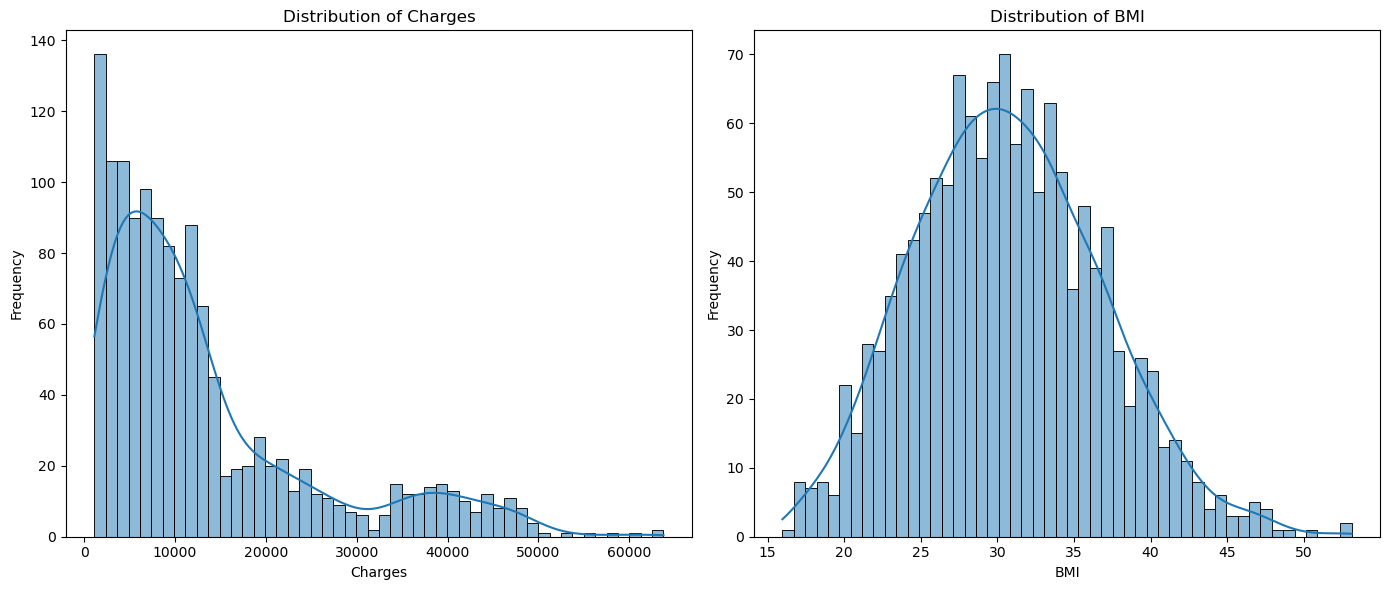

In [12]:
# Plotting distribution of charges
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

charges=df["charges"]
sns.histplot(charges, bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Charges')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frequency')

# Plotting distribution of BMI
bmi=df["bmi"]
sns.histplot(bmi, bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of BMI')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


**Since we are using Random Forrest regression standardisation of data points is not nessecary.**

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Print out the metrics
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Square Error: {rf_rmse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")


Mean Squared Error: 22047809.5670083
Root Mean Square Error: 4695.5095109059575
Mean Absolute Error: 2550.7482168551355
R-squared: 0.8579839631850609


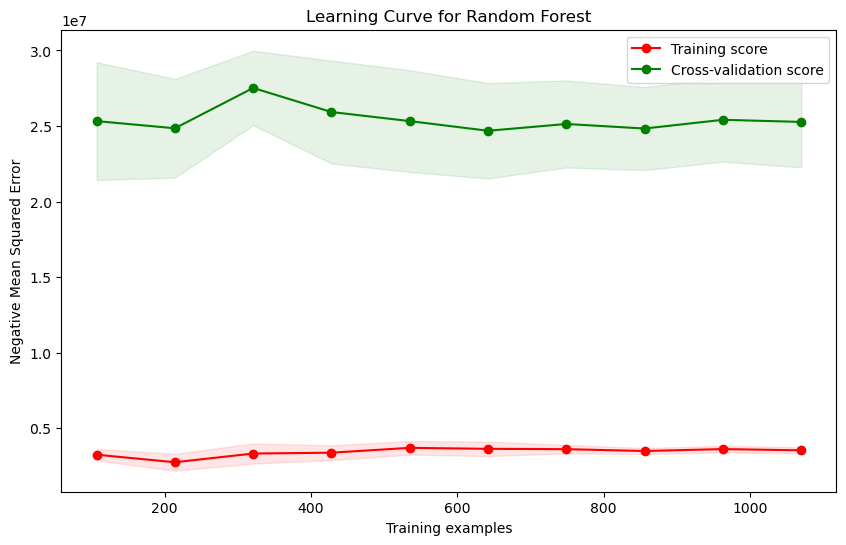

In [30]:
from sklearn.model_selection import learning_curve

# Define the RandomForestRegressor model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, 
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()


the learning curve suggests that the random forest model is learning well and is not overfitting the training data. This means that the model is likely to perform well on unseen data.



In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
rf_cross_val_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
rf_cross_val_mean = np.mean(rf_cross_val_scores)
rf_cross_val_std = np.std(rf_cross_val_scores)

# Print out the mean and standard deviation
print(f"Mean of cross-validation scores: {rf_cross_val_mean}")
print(f"Standard deviation of cross-validation scores: {rf_cross_val_std}")


Mean of cross-validation scores: 0.8259266710489866
Standard deviation of cross-validation scores: 0.0309787025263094


In [20]:
rf_cross_val_scores

array([0.84983265, 0.76969968, 0.85568324, 0.81780976, 0.83660803])

In [21]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by the importances
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)


    Feature  Importance
4    smoker    0.608618
2       bmi    0.228437
0       age    0.135413
3  children    0.020929
1       sex    0.006601


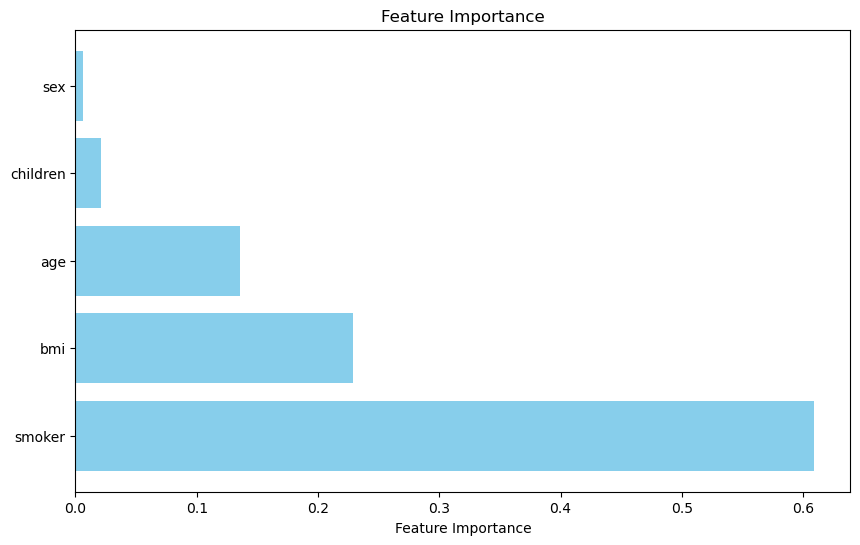

In [23]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by the importances
importance_df = importance_df.sort_values('Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


Text(0, 0.5, 'Residuals')

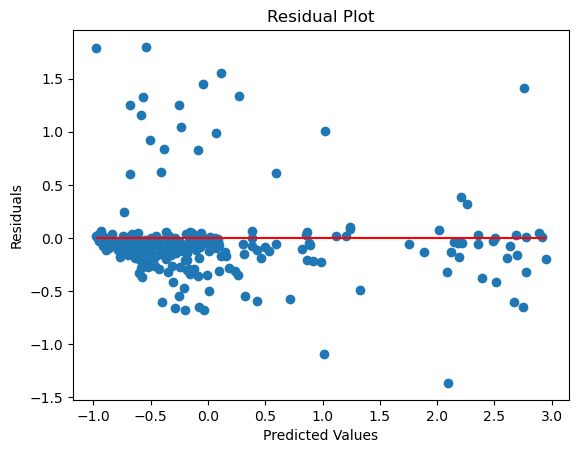

In [74]:
residuals = y_test - rf_y_pred
plt.scatter(rf_y_pred, residuals)
plt.hlines(y=0, xmin=rf_y_pred.min(), xmax=rf_y_pred.max(), colors='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')


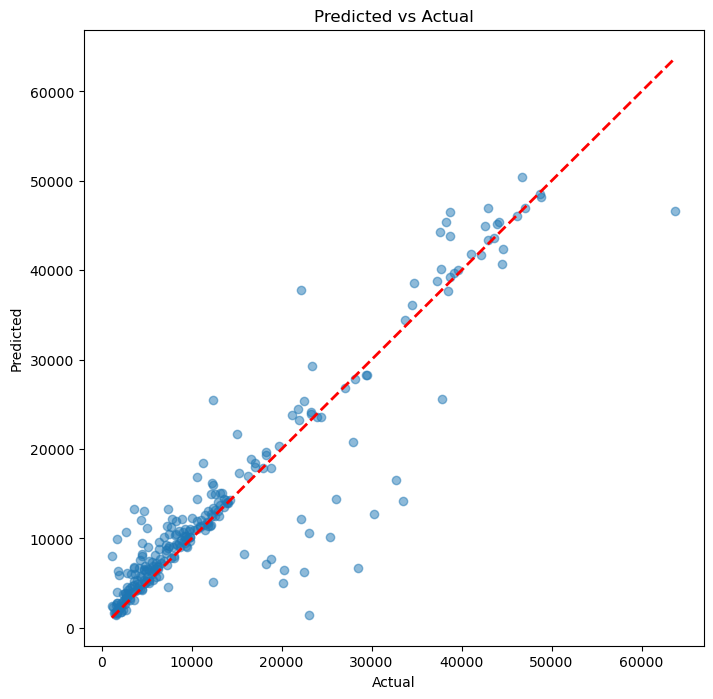

In [24]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
